# 21 Making Graphs and Manipulating Images

## Images

Use Pillow (PIL) to edit imnages

In [1]:
from PIL import ImageColor
ImageColor.getcolor('red', 'RGBA')

(255, 0, 0, 255)

In [2]:
ImageColor.getcolor('Red', 'RGBA')

(255, 0, 0, 255)

In [3]:
ImageColor.getcolor('RED', 'RGBA')

(255, 0, 0, 255)

In [4]:
list(ImageColor.colormap)

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgrey',
 'darkgreen',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'grey',
 'green',
 'greenyellow',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgreen',


Image pixels are addressed with x- and y-coordinates, which respectively specify a pixel’s horizontal and vertical locations in an image. The origin is the pixel at the top-left corner of the image and is specified with the notation (0, 0).

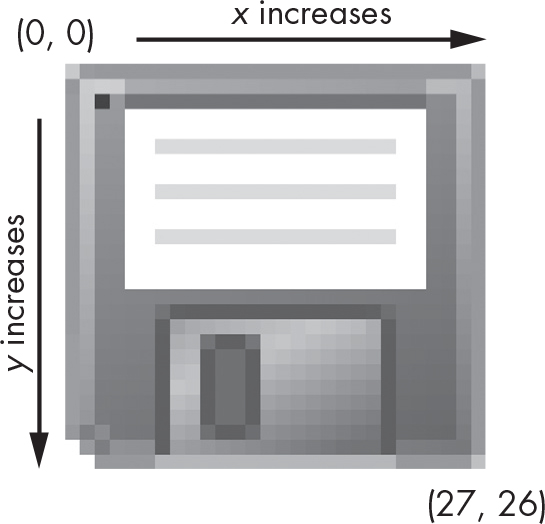

In [5]:
from PIL import Image
cat_im = Image.open('zophie.png')
cat_im.show()

In [6]:
cat_im.size

(695, 926)

In [7]:
width, height = cat_im.size
width

695

In [8]:
height

926

In [9]:
cat_im.filename

'zophie.png'

In [10]:
cat_im.format

'JPEG'

In [11]:
cat_im.format_description

'JPEG (ISO 10918)'

In [12]:
cat_im.save('zophie.jpg')

In [13]:
from PIL import Image
im = Image.new('RGBA', (100, 200), 'purple')
im.save('purpleImage.png')
im.show()

In [14]:
from PIL import Image
cat_im = Image.open("zophie.png")
cropped_im = cat_im.crop((335, 345, 565, 560))
cropped_im.save('cropped.png')
cropped_im.show()

In [15]:
from PIL import Image
cat_im = Image.open('zophie.png')
cat_copy_im = cat_im.copy()

In [16]:
face_im = cat_im.crop((335, 345, 565, 560))
cat_copy_im.paste(face_im, (0, 0))
cat_copy_im.paste(face_im, (400, 500))
cat_copy_im.save('pasted.png')
cat_copy_im.show()

In [17]:
cat_im_width, cat_im_height = cat_im.size
face_im_width, face_im_height = face_im.size
cat_copy_im = cat_im.copy()
for left in range(0, cat_im_width, face_im_width):
    for top in range(0, cat_im_height, face_im_height):
        print(left, top)
        cat_copy_im.paste(face_im, (left, top))
cat_copy_im.save('tiled.png')

0 0
0 215
0 430
0 645
0 860
230 0
230 215
230 430
230 645
230 860
460 0
460 215
460 430
460 645
460 860
690 0
690 215
690 430
690 645
690 860


## Resizing images

In [18]:
from PIL import Image
cat_im = Image.open('zophie.png')
width, height = cat_im.size
quarter_sized_im = cat_im.resize((int(width / 2), int(height / 2)))
quarter_sized_im.save('quarter_size.png')
svelte_im = cat_im.resize((width, height + 300))
svelte_im.save('svelte.png')

## Rotating and flipping images

In [19]:
from PIL import Image
cat_im = Image.open('zophie.png')
cat_im.rotate(90).save('rotated90.png')
cat_im.rotate(180).save('rotated180.png')
cat_im.rotate(270).save('rotated270.png')

In [20]:
cat_im.rotate(6).save('rotated6.png')
cat_im.rotate(6, expand=True).save('rotated6_expanded.png')

In [21]:
cat_im.transpose(Image.FLIP_LEFT_RIGHT).save('horizontal_flip.png')

In [22]:
cat_im.transpose(Image.FLIP_TOP_BOTTOM).save('vertical_flip.png')

In [24]:
## Changing individual pixels
from PIL import Image
im = Image.new('RGBA', (100, 100))
im.getpixel((0, 0))

for x in range(100):
    for y in range(50):
        im.putpixel((x, y), (210, 210, 210))

from PIL import ImageColor
for x in range(100):
    for y in range(50, 100):
        im.putpixel((x, y), ImageColor.getcolor('darkgray', 'RGBA'))
im.save('putPixel.png')

## Project 16: Add a Logo

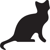

In [3]:
# Resizes images to fit in a 300x300 square with a logo in the corner
from math import log
import os
from PIL import Image

SQUARE_FIT_SIZE = 300
LOGO_FILENAME = 'catlogo.png'

logo_im = Image.open(LOGO_FILENAME)
logo_im = logo_im.resize((50, 50))
logo_im

## Drawing

In [5]:
from PIL import Image, ImageDraw
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)
draw.line([(0, 0), (199, 0), (199, 199), (0, 199), (0, 0)], fill='black')
draw.rectangle((20, 30, 60, 60), fill='blue') 
draw.ellipse((120, 30, 160, 60), fill='red') 
draw.polygon(((57, 87), (79, 62), (94, 85), (120, 90), (103, 113)), fill='brown') 
for i in range(100, 200, 10): 
    draw.line([(i, 0), (200, i - 100)], fill='green')

im.save('drawing.png')

## Text

In [7]:
from PIL import Image, ImageDraw, ImageFont
import os
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)
draw.text((20, 150), 'Hello', fill='purple')
draw.text((100, 150), 'Howdy', fill='gray')
im.save('text.png')

## Pasting images

In [8]:
from PIL import Image
im = Image.open('zophie.png')
import pyperclipimg
pyperclipimg.copy(im)
pasted_im = pyperclipimg.paste() # Now copy a new image to the clipboard.
# Paste the clipboard contents to a graphics program.
pasted_im.show()  # Shows the image from the clipboard